In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "./data/mouse_drug_data.csv"
clinical_trial_data_to_load = "./data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_data = pd.merge(clinical_data, mouse_data).sort_values(by="Timepoint")

# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


## Tumor Response to Treatment

In [12]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_data = merged_data.groupby(by=["Drug", "Timepoint"])["Tumor Volume (mm3)"]

# Convert to DataFrame
data_mean = pd.DataFrame(drug_time_data.mean().reset_index())

# Preview DataFrame
data_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [13]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
data_series = pd.DataFrame(drug_time_data.sem())

# Convert to DataFrame
data_series.reset_index(inplace=True)

# Preview DataFrame
data_series.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [117]:
# Minor Data Munging to Re-Format the Data Frames
Reformatting = data_mean.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting.head()
Reformatting.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


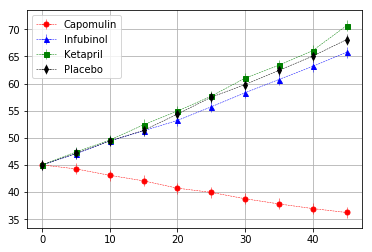

In [154]:
# Generate the Plot (with Error Bars)
x = Reformatting.index.values
yerr_ = 1
xerr_ = 0

fig = plt.figure()

plt.errorbar(x, Reformatting['Capomulin'],xerr=xerr_, yerr=yerr_, fmt='ro--', ecolor='red', linewidth=0.5, markersize=5)
plt.errorbar(x, Reformatting['Infubinol'],xerr=xerr_, yerr=yerr_, fmt='b^--', ecolor='blue', linewidth=0.5, markersize=5)
plt.errorbar(x, Reformatting['Ketapril'],xerr=xerr_, yerr=yerr_, fmt='gs--', ecolor='green', linewidth=0.5, markersize=5)
plt.errorbar(x, Reformatting['Placebo'],xerr=xerr_, yerr=yerr_, fmt='kd--', ecolor='black', linewidth=0.5, markersize=5)

plt.legend()
plt.grid()

# Save the Figure
fig.savefig('./images/Reformatting.png')

In [116]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [122]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_time_met_site = merged_data.groupby(by=["Drug", "Timepoint"])["Metastatic Sites"]

# Convert to DataFrame
drug_time_met_site = pd.DataFrame(drug_time_met_site.mean())

# Preview DataFrame
drug_time_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [133]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_time_met_site_sem = merged_data.groupby(by=["Drug", "Timepoint"])["Metastatic Sites"]

# Convert to DataFrame
drug_time_met_site_sem = pd.DataFrame(drug_time_met_site_sem.sem())

# Preview DataFrame
drug_time_met_site_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [143]:
# Minor Data Munging to Re-Format the Data Frames
drug_time_met_site.reset_index(inplace=True)
drug_time_met_site = drug_time_met_site.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked

drug_time_met_site.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


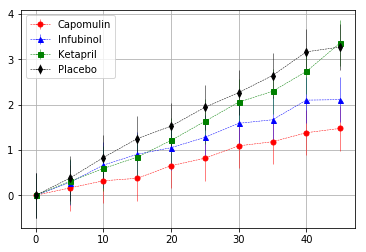

In [155]:
# Generate the Plot (with Error Bars)
x = drug_time_met_site.index.values
yerr_ = 0.5
xerr_ = 0

plt.ioff()

fig = plt.figure()
plt.errorbar(x, drug_time_met_site['Capomulin'],xerr=xerr_, yerr=yerr_, fmt='ro--', ecolor='red', linewidth=0.5, markersize=5)
plt.errorbar(x, drug_time_met_site['Infubinol'],xerr=xerr_, yerr=yerr_, fmt='b^--', ecolor='blue', linewidth=0.5, markersize=5)
plt.errorbar(x, drug_time_met_site['Ketapril'],xerr=xerr_, yerr=yerr_, fmt='gs--', ecolor='green', linewidth=0.5, markersize=5)
plt.errorbar(x, drug_time_met_site['Placebo'],xerr=xerr_, yerr=yerr_, fmt='kd--', ecolor='black', linewidth=0.5, markersize=5)

plt.legend()
plt.grid()

# Save the Figure
plt.savefig('./images/metSite.png')
# Show the Figure
plt.show()

## Survival Rates

In [156]:
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


In [158]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_time_mice = merged_data.groupby(by=["Drug", "Timepoint"])["Mouse ID"]

# Convert to DataFrame
drug_time_mice = pd.DataFrame(drug_time_mice.count()).reset_index()

# Preview DataFrame
drug_time_mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [159]:
# Minor Data Munging to Re-Format the Data Frames
drug_time_mice = drug_time_mice.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

# Preview the Data Frame
drug_time_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


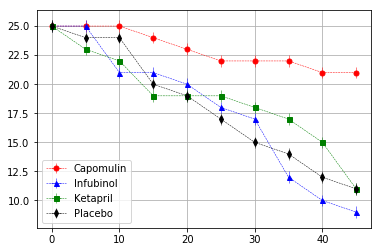

In [160]:
# Generate the Plot (Accounting for percentages)

x = drug_time_mice.index.values
yerr_ = 0.5
xerr_ = 0

plt.ioff()

fig = plt.figure()
plt.errorbar(x, drug_time_mice['Capomulin'],xerr=xerr_, yerr=yerr_, fmt='ro--', ecolor='red', linewidth=0.5, markersize=5)
plt.errorbar(x, drug_time_mice['Infubinol'],xerr=xerr_, yerr=yerr_, fmt='b^--', ecolor='blue', linewidth=0.5, markersize=5)
plt.errorbar(x, drug_time_mice['Ketapril'],xerr=xerr_, yerr=yerr_, fmt='gs--', ecolor='green', linewidth=0.5, markersize=5)
plt.errorbar(x, drug_time_mice['Placebo'],xerr=xerr_, yerr=yerr_, fmt='kd--', ecolor='black', linewidth=0.5, markersize=5)

plt.legend()
plt.grid()

# Save the Figure
plt.savefig('./images/mice.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [172]:
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


In [288]:
# Calculate the percent changes for each drug
# First I get the mean on Tumor Volume (mm3), grouping by Drug and TimePoint, in order to have a distribution per drug.
ds = merged_data \
        .groupby(by=["Drug", "Timepoint"])["Tumor Volume (mm3)"] \
        .mean() \
        .reset_index()

# Then I try to pivot the data frame in order to set columns of values per drug.
ds = ds.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)") \
        .reset_index() \
        .drop(columns="Timepoint")

# Apply the Percent Change function from pandas! NOTE: I am taking 9 as the periods because is the number of observations.
ds = ds.pct_change(periods=9) * 100

ds = ds.tail(1).squeeze()

# Display the data to confirm
ds

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 9, dtype: float64

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

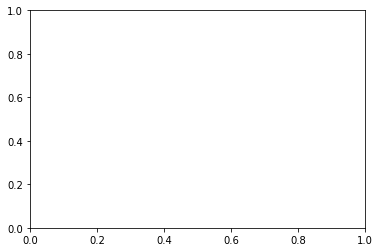

In [296]:
fig = plt.figure()

# Store all Relevant Percent Changes into a Tuple
ds = ds[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Splice the data between passing and failing drugs

plt.bar(*zip(ds, ds.index))

# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
# fig.show()

# .plot(kind="bar")

# ds